<center>
    <h1> CardioRisk: Unraveling Patterns for Early Diagnosis Using Machine Learning </h1>
    <h2> Modeling : Decision Tree </h2>
    <h4> Vani Kancherlapalli </h4>
</center>

## 1. Load Train, Validation and Test Sets

In [ ]:
# Import general libraries
import pandas as pd
import numpy as np
# Import libraries related to accuracy
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, log_loss
from sklearn.metrics import roc_curve, auc

# Import libraries related to graphs
import seaborn as sns
import matplotlib.pyplot as plt

# Import necessary libraries for DT
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

# Read the datasets from the CSV files
X_train = pd.read_csv('Split Data/X_train_pca.csv')
y_train = pd.read_csv('Split Data/y_train.csv').iloc[:, 0]

X_val = pd.read_csv('Split Data/X_val_pca.csv')
y_val = pd.read_csv('Split Data/y_val.csv').iloc[:, 0]

X_test = pd.read_csv('Split Data/X_test_pca.csv')
y_test = pd.read_csv('Split Data/y_test.csv').iloc[:, 0]

In [ ]:
# Show shape for train
X_train.shape

(719, 41)

In [ ]:
# Show shape for val
X_val.shape

(90, 41)

In [ ]:
# Show shape for test
X_test.shape

(90, 41)

In [ ]:
# Drop the target feature
X_train.drop(columns=['target'], inplace=True)
X_val.drop(columns=['target'], inplace=True)
X_test.drop(columns=['target'], inplace=True)

## 2. Baseline Model (Train Set)

Train Entropy: 0.9889189412129864
Train MSE: 0.0
Train Gini Impurity: 0.49233888049582064


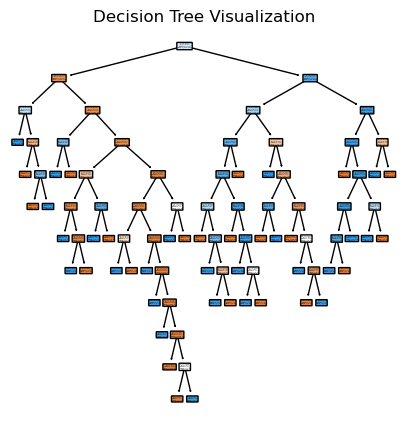

Decision Tree : Training Accuracy: 1.0000
Classification Report on Training Set:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       315
         1.0       1.00      1.00      1.00       404

    accuracy                           1.00       719
   macro avg       1.00      1.00      1.00       719
weighted avg       1.00      1.00      1.00       719



In [ ]:
# Initialize the DT classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = decision_tree_model.predict(X_train)

# Calculate the probability estimates for positive class (class 1)
y_train_proba = decision_tree_model.predict_proba(X_train)[:, 1]

# Entropy calculation function
def calculate_entropy(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Mean Squared Error (MSE) calculation function
def calculate_mse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

# Gini impurity calculation function
def calculate_gini_impurity(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    gini_impurity = 1 - np.sum(probabilities ** 2)
    return gini_impurity


# Calculate metrics
train_entropy = calculate_entropy(y_train)
train_mse = calculate_mse(y_train, y_train_pred)
train_gini_impurity = calculate_gini_impurity(y_train)


# Print the metrics
print("Train Entropy:", train_entropy)
print("Train MSE:", train_mse)
print("Train Gini Impurity:", train_gini_impurity)


# This will display a visual representation of the decision tree.
# Each node in the tree represents a decision based on a specific feature, and the leaves
# represent the predicted class. The color and size of the nodes can indicate various
# properties of the tree nodes.
plt.figure(figsize=(5, 5))
plot_tree(decision_tree_model, feature_names=X_train.columns.tolist(), class_names=['0', '1'], filled=True, rounded=True)
plt.title(f'Decision Tree Visualization')
plt.show()


# Evaluate the model on the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Decision Tree : Training Accuracy: {accuracy_train:.4f}")


# Display classification report on the test set
print("Classification Report on Training Set:\n", classification_report(y_train, y_train_pred))


Training Confusion Matrix:
[[315   0]
 [  0 404]]


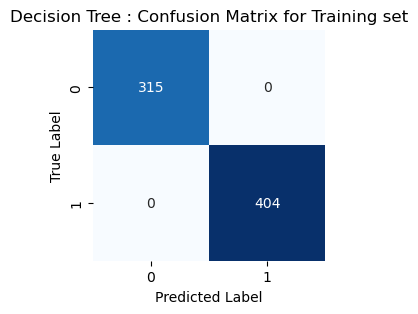

In [ ]:
# Confusion matrix for training set
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
print("\nTraining Confusion Matrix:")
print(train_conf_matrix)

# Plot the confusion matrix for training set
plt.figure(figsize=(3, 3))
sns.heatmap(train_conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree : Confusion Matrix for Training set')
plt.show()

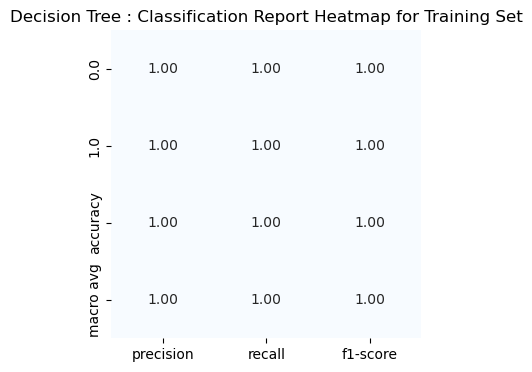

In [ ]:
# Display classification report on the test set
classification_rep = classification_report(y_train, y_train_pred, output_dict=True)

# Convert the classification report to a DataFrame for better visualization
classification_df = pd.DataFrame(classification_rep).transpose()

# Create a heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(classification_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title('Decision Tree : Classification Report Heatmap for Training Set')
plt.show()

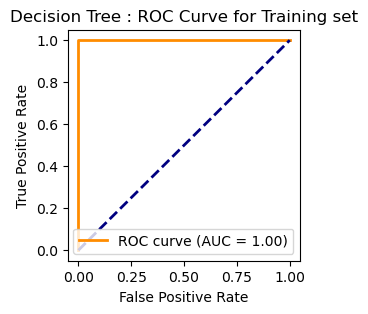

In [ ]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train, y_train_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(3, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree : ROC Curve for Training set')
plt.legend(loc='lower right')
plt.show()

## 3. Model Validation: Cross Validation & Hyperparameter Tuning (Validation Set)

In [ ]:
# Define the parameter grid for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 5, 7],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data (using training set)
grid_search.fit(X_val, y_val)

# Print the best parameters and corresponding accuracy
print("Decision Tree Best Parameters:", grid_search.best_params_)
print(f"Decision Tree Best Validation Accuracy: {grid_search.best_score_:.4f}")

# Get the best model
best_dt_model = grid_search.best_estimator_

# Now you can use this best model for predictions on your validation or test set
y_val_pred_dt = best_dt_model.predict(X_val)

# You can also calculate metrics on the validation set using the same approach as you did for the training set
val_accuracy_dt = accuracy_score(y_val, y_val_pred_dt)
val_classification_report_dt = classification_report(y_val, y_val_pred_dt)

# Print validation metrics
print(f"Decision Tree Validation Accuracy: {val_accuracy_dt:.4f}")
print("\nDecision Tree Validation Classification Report:")
print(val_classification_report_dt)

Decision Tree Best Parameters: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 2}
Decision Tree Best Validation Accuracy: 0.7778
Decision Tree Validation Accuracy: 0.8778

Decision Tree Validation Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88        44
         1.0       0.93      0.83      0.87        46

    accuracy                           0.88        90
   macro avg       0.88      0.88      0.88        90
weighted avg       0.88      0.88      0.88        90



## 4. Model Evaluation (Test Set)

In [ ]:
# Using the best estimator from the grid search to make predictions on the test data
y_test_pred = grid_search.best_estimator_.predict(X_test)
y_test_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Calculate metrics
test_entropy = calculate_entropy(y_test)
test_mse = calculate_mse(y_test, y_test_pred)
test_gini_impurity = calculate_gini_impurity(y_test)


# Print the metrics
print("Test Entropy:", test_entropy)
print("Test MSE:", test_mse)
print("Test Gini Impurity:", test_gini_impurity)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Decision Tree : Test Accuracy: {accuracy_test:.4f}")

# Display classification report on the test set
print("Decision Tree : Classification Report on Testing Set:\n", classification_report(y_test, y_test_pred))

Test Entropy: 1.0
Test MSE: 0.16666666666666666
Test Gini Impurity: 0.5
Decision Tree : Test Accuracy: 0.8333
Decision Tree : Classification Report on Testing Set:
               precision    recall  f1-score   support

         0.0       0.79      0.91      0.85        45
         1.0       0.89      0.76      0.82        45

    accuracy                           0.83        90
   macro avg       0.84      0.83      0.83        90
weighted avg       0.84      0.83      0.83        90




Decision Tree : Test Confusion Matrix:
[[41  4]
 [11 34]]


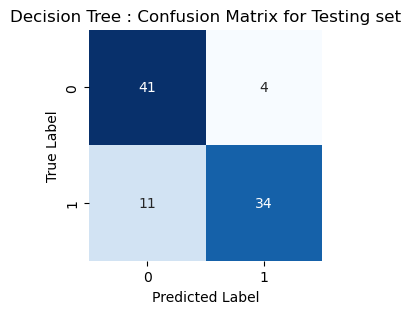

In [ ]:
# Confusion matrix
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nDecision Tree : Test Confusion Matrix:")
print(test_conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(test_conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree : Confusion Matrix for Testing set')
plt.show()

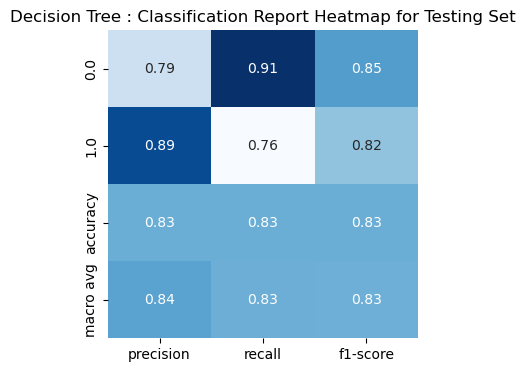

In [ ]:
# Display classification report on the test set
classification_rep_test = classification_report(y_test, y_test_pred, output_dict=True)

# Convert the classification report to a DataFrame for better visualization
classification_df_test = pd.DataFrame(classification_rep_test).transpose()

# Create a heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(classification_df_test.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title('Decision Tree : Classification Report Heatmap for Testing Set')
plt.show()

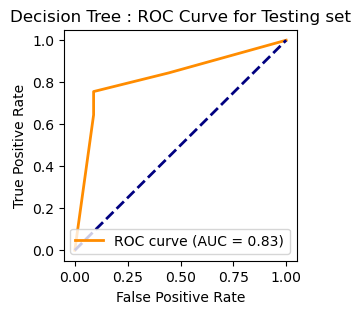

In [ ]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(3, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree : ROC Curve for Testing set')
plt.legend(loc='lower right')
plt.show()

## 5. Model Interpretability/Explainability

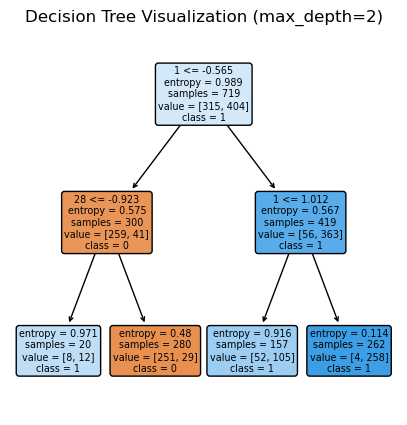

In [ ]:
# This will display a visual representation of the decision tree.
# Each node in the tree represents a decision based on a specific feature, and the leaves
# represent the predicted class. The color and size of the nodes can indicate various
# properties of the tree nodes.
# Create a decision tree model with max_depth
max_depth_value = 2
decision_tree_model_inter = DecisionTreeClassifier(max_depth=max_depth_value, criterion='entropy',random_state=42)

# Train the model on the training data
decision_tree_model_inter.fit(X_train, y_train)

plt.figure(figsize=(5, 5))
plot_tree(decision_tree_model_inter, feature_names=X_train.columns.tolist(), class_names=['0', '1'], filled=True, rounded=True)
plt.title(f'Decision Tree Visualization (max_depth={max_depth_value})')
plt.show()

Top Features:
    Feature  Importance
0        1    0.613343
3        4    0.051611
1        2    0.048151
8        9    0.026220
27      28    0.025991


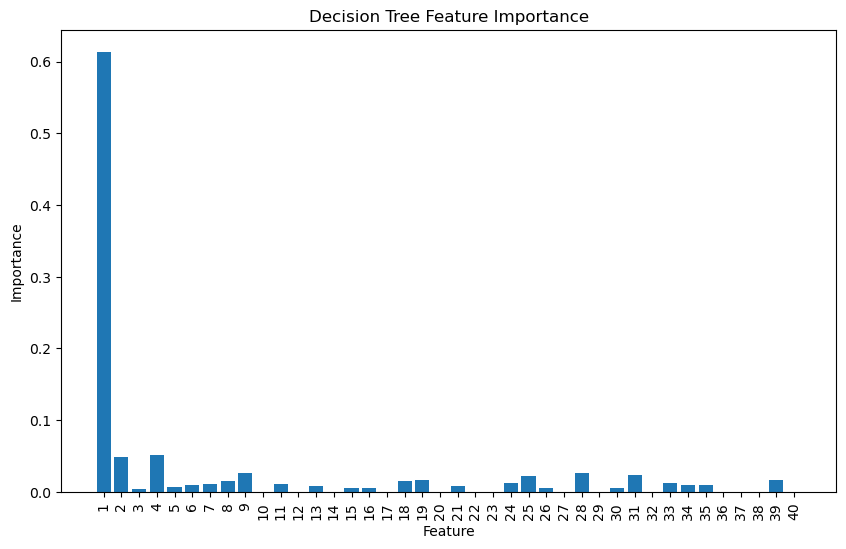

In [ ]:
# Feature Importance for the Decision Tree
feature_importances = decision_tree_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print("Top Features:\n", feature_importance_df.head())

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, align='center')
plt.xticks(range(len(feature_importances)), X_train.columns, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Decision Tree Feature Importance')
plt.show()

In [ ]:
# Install shap
# SHAP (SHapley Additive exPlanations)--SHAP values help to understand
# the impact of each feature on the model's predictions.

#pip install shap

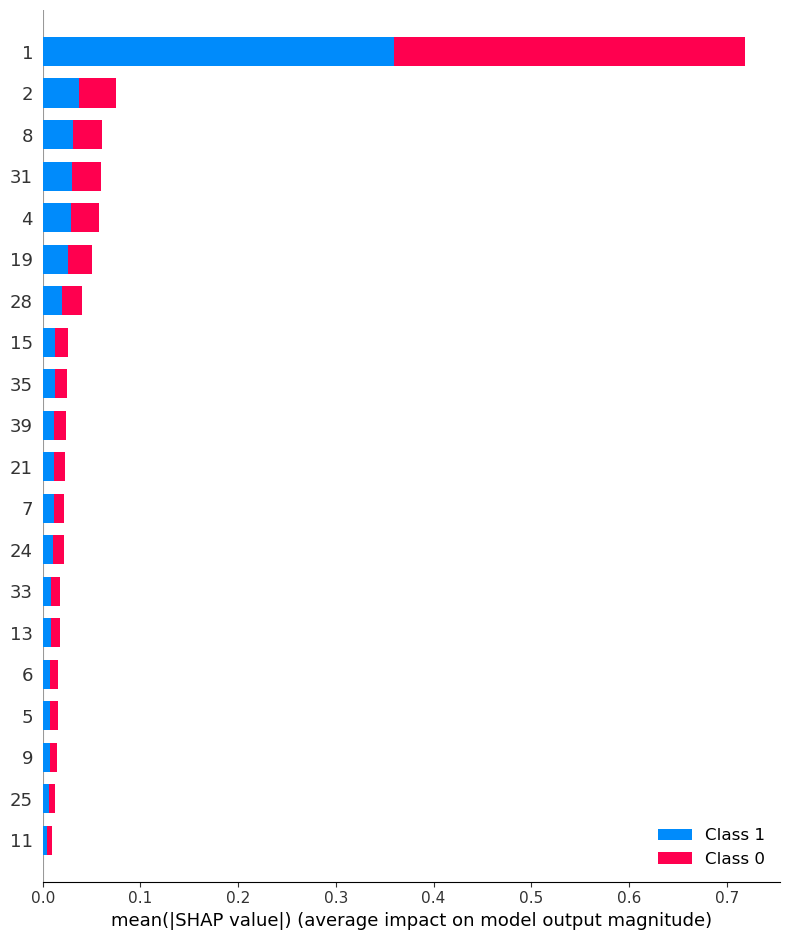

In [ ]:
# SHAP (SHapley Additive exPlanations)--SHAP values help to understand
# the impact of each feature on the model's predictions.


import shap

# Create a SHAP explainer object
explainer = shap.TreeExplainer(decision_tree_model)

# Calculate SHAP values for a subset of the test data, it does take a little while to execute
shap_values = explainer.shap_values(X_test.iloc[:100, :])

# Summary plot
# Class 0 - does not have heart disease; Class 1 - heart disease detected
# The summary plot helps visualize the relative importance of different features in making predictions.
# This kind of analysis can be valuable for understanding model behavior and making the model's predictions
# more interpretable.
shap.summary_plot(shap_values, X_test.iloc[:100, :], plot_type='bar')

In [ ]:
import pickle

# Save a model to a file
with open('model_vani_dt.pkl', 'wb') as file:
    pickle.dump(decision_tree_model, file)

## 6. Limitations and Future Work

### Limitations:

Overfitting: The UCI heart disease dataset has 899 records by combining the different regions. This is low count and the model is prone to overfitting. As a result I have set the max_depth size to 2.

PCA challenges: Interpreting models that use Principal Component Analysis (PCA) introduces challenges. While we can discern the significance of individual components, the interpretability of the model becomes less straightforward compared to models trained on the original features. This lack of clarity is especially evident multiple original features contribute to each principal component.

Sensitivity to Small Variations: Decision trees can be sensitive to small variations in the data. A slight change in the dataset might lead to a completely different tree structure.

Biased Towards Dominant Classes: In imbalanced datasets, decision trees tend to be biased towards dominant classes, and smaller classes may be underrepresented in the splits.

Instability: Decision trees can be highly unstable, meaning that small changes in the data can lead to significant changes in the structure of the tree.

### Future Work:
Data Augmentation/Data synthetization: Generate synthetic samples to increase the volume of the training dataset.

Model Refinement: Further fine-tune with additional hyperparameters to improve performance, as the size of dataset grows.

Feature Engineering: Explore additional feature engineering techniques to derive more informative features, while retaining the original feature definition.

Automation and Continuous Improvement: Implement automation for model training, evaluation, and deployment.
Establish mechanisms for continuous monitoring and improvement.